In [1]:
%pylab inline

import numpy as n
import scipy as sp
import pystan


Populating the interactive namespace from numpy and matplotlib


In [2]:
model_code = """
data {
  int<lower = 0> N;
  int<lower = 0, upper = 1> y[N];
}
parameters {
  real<lower = 0, upper = 1> theta;
}
model {
  y ~ bernoulli(theta);  
}
"""

sm = pystan.StanModel(model_code=model_code,model_name='bernoulli')

In [3]:
n.random.seed(0)

theta = 0.65
data = {}
data['N'] = 1000
data['y'] = n.require(n.random.rand(1000) < theta,dtype=n.int32)



In [4]:
map_soln = sm.optimizing(data=data)
print(map_soln)

OrderedDict([(u'theta', array(0.6560001312988919))])


Inference for Stan model: bernoulli_1380e11a6c8b9c7fddb72f95376a4375.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta   0.66  5.1e-4   0.02   0.63   0.65   0.66   0.67   0.69  889.0    1.0
lp__  -645.6    0.02   0.68 -647.6 -645.8 -645.3 -645.2 -645.1  841.0   1.01

Samples were drawn using NUTS(diag_e) at Tue Apr 26 16:02:22 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


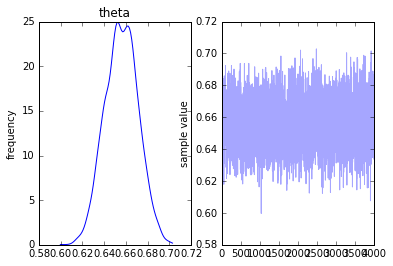

In [5]:
mcmc_samples = sm.sampling(data=data)
vals = mcmc_samples.extract()
mcmc_samples.plot()
print(mcmc_samples)
